In [2]:
!pip install pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
print("Libraries imported successfully!")

Libraries imported successfully!


In [10]:

file_name = 'Netflix Dataset 1 (2).csv'

try:
    netflix_df = pd.read_csv(file_name)
    print(f"Successfully loaded '{file_name}'")
    print("First 5 rows of the data:")
    print(netflix_df.head())
except FileNotFoundError:
    print(f"ERROR: The file '{file_name}' was not found.")
    print("Please make sure you uploaded it to the same folder as this notebook.")

Successfully loaded 'Netflix Dataset 1 (2).csv'
First 5 rows of the data:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   


In [11]:

netflix_df['Release_Year'] = pd.to_datetime(netflix_df['Release_Date'], errors='coerce').dt.year

original_rows = len(netflix_df)
netflix_df = netflix_df.dropna(subset=['Release_Year']) 
cleaned_rows = len(netflix_df)

print(f"Removed {original_rows - cleaned_rows} rows with missing or bad release dates.")

# Convert the year to an integer
netflix_df['Release_Year'] = netflix_df['Release_Year'].astype(int)

print("\nData cleaned and 'Release_Year' column created.")
print(netflix_df[['Title', 'Release_Date', 'Release_Year']].head())

Removed 98 rows with missing or bad release dates.

Data cleaned and 'Release_Year' column created.
   Title       Release_Date  Release_Year
0     3%    August 14, 2020          2020
1  07:19  December 23, 2016          2016
2  23:59  December 20, 2018          2018
3      9  November 16, 2017          2017
4     21    January 1, 2020          2020


--- Analysis 1: Movie vs. TV Show Trend ---


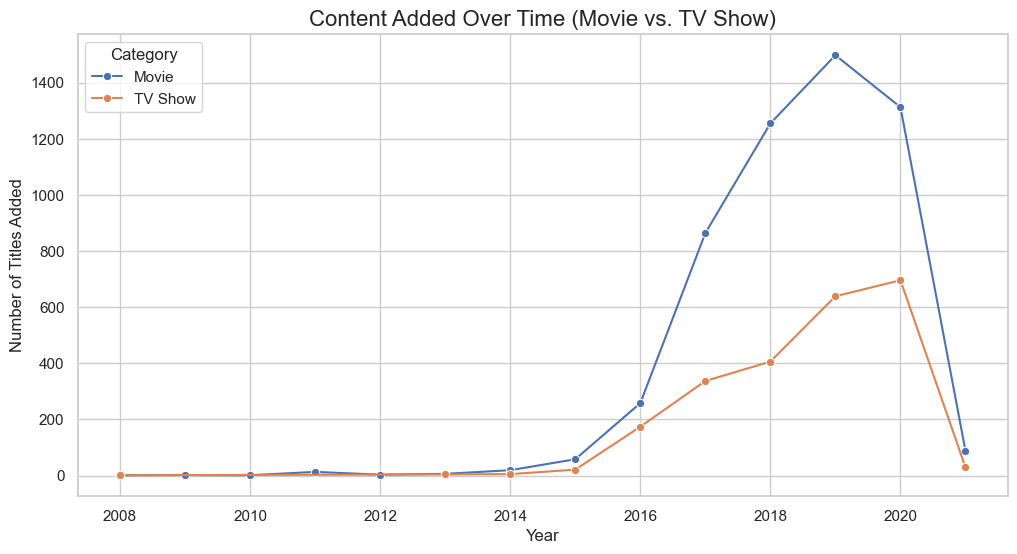

In [6]:
print("--- Analysis 1: Movie vs. TV Show Trend ---")

# Group by year and category (Movie/TV Show)
cat_year_counts = netflix_df.groupby(['Release_Year', 'Category']).size().reset_index(name='Count')

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=cat_year_counts, x='Release_Year', y='Count', hue='Category', marker='o')
plt.title('Content Added Over Time (Movie vs. TV Show)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.legend(title='Category')
plt.show()

--- Analysis 2: Genre Popularity Trend ---


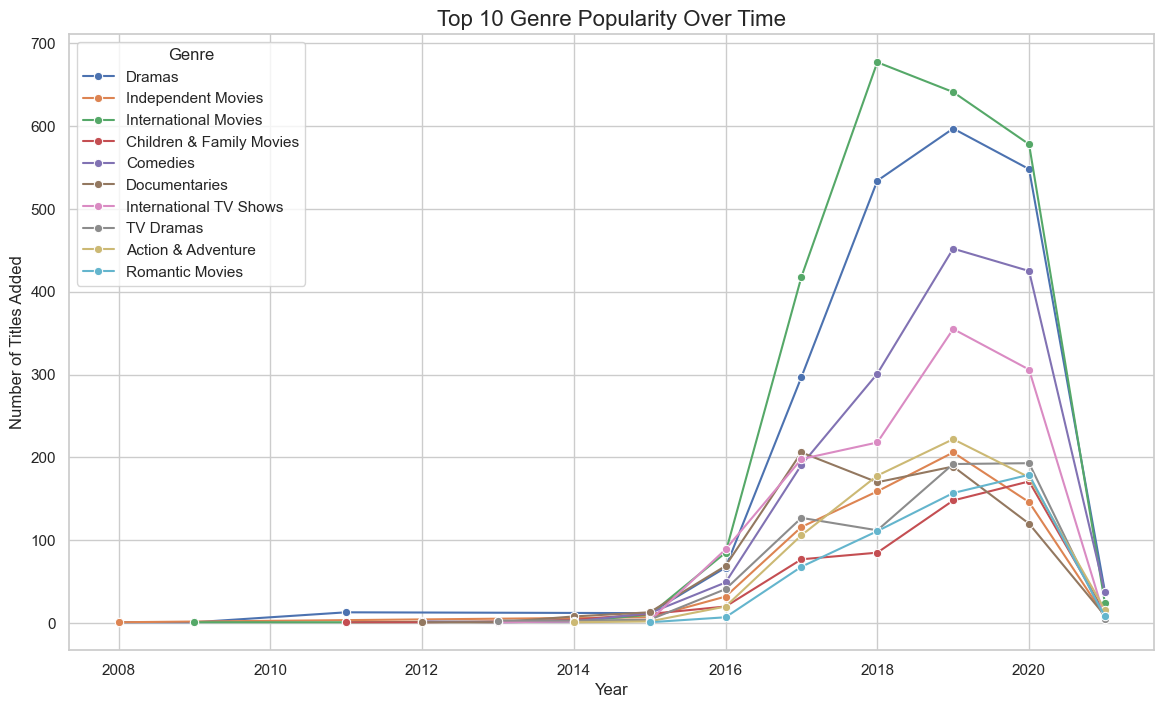

In [7]:
print("--- Analysis 2: Genre Popularity Trend ---")

# Split the 'Type' (genres) column and 'explode' it
exploded_genres = netflix_df.assign(Genre=netflix_df['Type'].str.split(', ')).explode('Genre')

# Clean up any extra spaces
exploded_genres['Genre'] = exploded_genres['Genre'].str.strip()

# Find the top 10 most common genres overall
top_10_genres = exploded_genres['Genre'].value_counts().head(10).index

# Filter our data to *only* include those top 10 genres
top_genres_df = exploded_genres[exploded_genres['Genre'].isin(top_10_genres)]

# Group by year and genre
genre_year_counts = top_genres_df.groupby(['Release_Year', 'Genre']).size().reset_index(name='Count')

# Create the plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=genre_year_counts, x='Release_Year', y='Count', hue='Genre', marker='o')
plt.title('Top 10 Genre Popularity Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.legend(title='Genre', loc='upper left')
plt.show()

--- Analysis 3: Top 10 Country Contributions ---


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20336\3367646933.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')


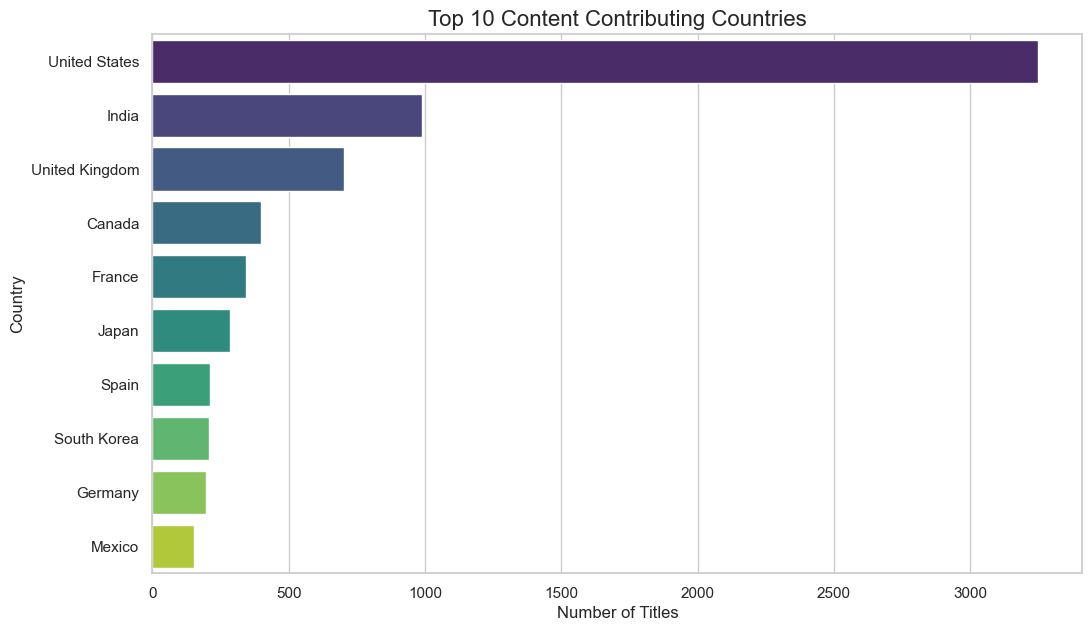

In [8]:
print("--- Analysis 3: Top 10 Country Contributions ---")

# Fill missing countries with 'Unknown'
netflix_df['Country'] = netflix_df['Country'].fillna('Unknown')

# Split and explode the 'Country' column
exploded_countries = netflix_df.assign(Country=netflix_df['Country'].str.split(', ')).explode('Country')

# Clean up spaces
exploded_countries['Country'] = exploded_countries['Country'].str.strip()

# Filter out 'Unknown' and get the top 10 countries
top_10_countries = exploded_countries[exploded_countries['Country'] != 'Unknown']['Country'].value_counts().head(10)

# Create the plot
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')
plt.title('Top 10 Content Contributing Countries', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()